# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [465]:
m = 2
A = 0.001#0.0492645084166179#0.049264507293701174#0.049264508247375494#0.04925#0.0493#0.001#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [466]:
global loggrid=true
global bisection=false
global meshrefinement=false;

In [467]:
using Quadmath, Printf

res=m;
N=2.0^m*100.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*100.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [468]:
print(N)

200.0

In [469]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.005
dt =0.0005
dx/dt =10.0


In [470]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [471]:
using Printf
include("./ScalarField.jl");

In [472]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.005
the time step is 0.0005


# Initial data of m β Ψ and Ψ,x

In [473]:
using Dierckx
using Quadmath


####
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [474]:
##AUX
auxinitm=zeros((L-6)*2+5);
auxinitbeta=zeros((L-6)*2+5);
auxinitpsi=zeros((L-6)*2+5);
auxinitderpsi=zeros((L-6)*2+5);
auxinitX=range(round(ori-3.0*dx/2,digits=10), stop=Xf+3.0*dx/2, step=dx/2)
auxinitX1=auxinitX[4:length(auxinitX)-3]
auxL=length(auxinitX)

auxstate_array=[auxinitm auxinitbeta auxinitpsi auxinitderpsi auxinitX];

#PSI
r0=0.7
sigma=0.3
auxinitpsi[4:auxL-3] = init_gaussian(auxinitX1,r0,sigma,A)

auxstate_array[:,3] = auxinitpsi
auxstate_array = ghost(auxstate_array)

#PSI,X FROM PSI
auxinitderpsi[4:auxL-3] = init_gaussian_der(auxinitX1,r0,sigma,A)
auxstate_array[:,4] = auxinitderpsi
auxstate_array=ghost(auxstate_array)

####

auxderpsi_func = Spline1D(auxinitX[4:auxL-3], auxstate_array[4:auxL-3,4],  k=4);

In [475]:
##AUX
y0=[0 0 0]
auxstate_array[4:auxL-3,1:3] = n_rk4wrapper(RHS,y0,auxinitX[4:auxL-3],0,auxderpsi_func,auxstate_array[:,:]);

In [476]:
y0=[0 0 0]
#state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],auxstate_array); #ghost grid

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

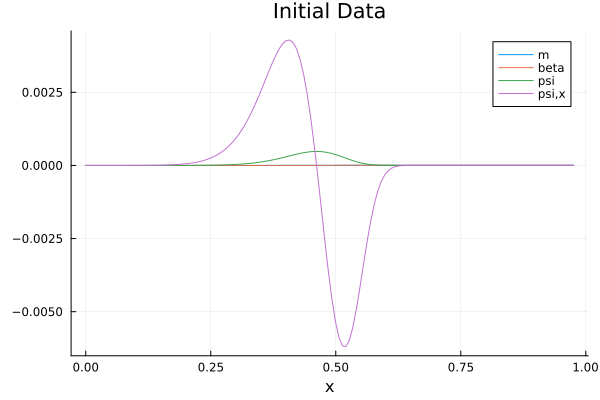

In [477]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [478]:
using CSV, Tables, Printf
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [479]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [480]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.09993806661615758


In [481]:
using Base.Threads
Threads.nthreads()

4

In [482]:
global dt=5e-5/2#/2

2.5e-5

 ## Time evolution

fixed grid

In [483]:
finaltime=1.3#1.6#2#1.3#0.08*2#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);#timeevolution(state_array,finaltime,dir*"/res$res",run,auxstate_array);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 2.5e-5, t=0.0024999999999999988 speed is 0.49995003720807946, dx/dt=200.0


iteration 200 dt is 2.5e-5, t=0.004999999999999984 speed is 0.49995003720807946, dx/dt=200.0


iteration 300 dt is 2.5e-5, t=0.0074999999999999685 speed is 0.49995003720807946, dx/dt=200.0


iteration 400 dt is 2.5e-5, t=0.01000000000000003 speed is 0.49995003720807946, dx/dt=200.0


iteration 500 dt is 2.5e-5, t=0.012500000000000101 speed is 0.49995003720807946, dx/dt=200.0


iteration 600 dt is 2.5e-5, t=0.015000000000000173 speed is 0.49995003720807946, dx/dt=200.0


iteration 700 dt is 2.5e-5, t=0.017500000000000245 speed is 0.49995003720807946, dx/dt=200.0


iteration 800 dt is 2.5e-5, t=0.020000000000000316 speed is 0.49995003720807946, dx/dt=200.0


iteration 900 dt is 2.5e-5, t=0.022500000000000388 speed is 0.49995003720807946, dx/dt=200.0


iteration 1000 dt is 2.5e-5, t=0.02500000000000046 speed is 0.49995003720807946, dx/dt=200.0


iteration 1100 dt is 2.5e-5, t=0.02750000000000



iteration 8800 dt is 2.5e-5, t=0.21999999999997985 speed is 0.49995003720807946, dx/dt=200.0


iteration 8900 dt is 2.5e-5, t=0.22249999999997958 speed is 0.49995003720807946, dx/dt=200.0


iteration 9000 dt is 2.5e-5, t=0.2249999999999793 speed is 0.49995003720807946, dx/dt=200.0


iteration 9100 dt is 2.5e-5, t=0.22749999999997902 speed is 0.49995003720807946, dx/dt=200.0


iteration 9200 dt is 2.5e-5, t=0.22999999999997875 speed is 0.49995003720807946, dx/dt=200.0


iteration 9300 dt is 2.5e-5, t=0.23249999999997847 speed is 0.49995003720807946, dx/dt=200.0


iteration 9400 dt is 2.5e-5, t=0.2349999999999782 speed is 0.49995003720807946, dx/dt=200.0


iteration 9500 dt is 2.5e-5, t=0.23749999999997792 speed is 0.49995003720807946, dx/dt=200.0


iteration 9600 dt is 2.5e-5, t=0.23999999999997765 speed is 0.49995003720807946, dx/dt=200.0


iteration 9700 dt is 2.5e-5, t=0.24249999999997737 speed is 0.49995003720807946, dx/dt=200.0


iteration 9800 dt is 2.5e-5, t=0.2449999999999771 



iteration 17500 dt is 2.5e-5, t=0.4374999999999559 speed is 0.4999500372080916, dx/dt=200.0


iteration 17600 dt is 2.5e-5, t=0.43999999999995565 speed is 0.4999500372080925, dx/dt=200.0


iteration 17700 dt is 2.5e-5, t=0.4424999999999554 speed is 0.49995003720809356, dx/dt=200.0


iteration 17800 dt is 2.5e-5, t=0.4449999999999551 speed is 0.4999500372080946, dx/dt=200.0


iteration 17900 dt is 2.5e-5, t=0.4474999999999548 speed is 0.49995003720809567, dx/dt=200.0


iteration 18000 dt is 2.5e-5, t=0.44999999999995455 speed is 0.4999500372080968, dx/dt=200.0


iteration 18100 dt is 2.5e-5, t=0.45249999999995427 speed is 0.499950037208098, dx/dt=200.0


iteration 18200 dt is 2.5e-5, t=0.454999999999954 speed is 0.49995003720809933, dx/dt=200.0


iteration 18300 dt is 2.5e-5, t=0.4574999999999537 speed is 0.4999500372081007, dx/dt=200.0


iteration 18400 dt is 2.5e-5, t=0.45999999999995345 speed is 0.49995003720810216, dx/dt=200.0


iteration 18500 dt is 2.5e-5, t=0.46249999999995317 



iteration 26200 dt is 2.5e-5, t=0.6550000000002761 speed is 0.4999500372094806, dx/dt=200.0


iteration 26300 dt is 2.5e-5, t=0.6575000000002814 speed is 0.4999500372095246, dx/dt=200.0


iteration 26400 dt is 2.5e-5, t=0.6600000000002867 speed is 0.4999500372095685, dx/dt=200.0


iteration 26500 dt is 2.5e-5, t=0.662500000000292 speed is 0.4999500372096125, dx/dt=200.0


iteration 26600 dt is 2.5e-5, t=0.6650000000002972 speed is 0.49995003720965625, dx/dt=200.0


iteration 26700 dt is 2.5e-5, t=0.6675000000003025 speed is 0.49995003720969966, dx/dt=200.0


iteration 26800 dt is 2.5e-5, t=0.6700000000003078 speed is 0.49995003720974274, dx/dt=200.0


iteration 26900 dt is 2.5e-5, t=0.6725000000003131 speed is 0.4999500372097852, dx/dt=200.0


iteration 27000 dt is 2.5e-5, t=0.6750000000003183 speed is 0.4999500372098267, dx/dt=200.0


iteration 27100 dt is 2.5e-5, t=0.6775000000003236 speed is 0.4999500372098675, dx/dt=200.0


iteration 27200 dt is 2.5e-5, t=0.6800000000003289 speed



iteration 34900 dt is 2.5e-5, t=0.8725000000007351 speed is 0.4999500372187089, dx/dt=200.0


iteration 35000 dt is 2.5e-5, t=0.8750000000007404 speed is 0.4999500372196385, dx/dt=200.0


iteration 35100 dt is 2.5e-5, t=0.8775000000007457 speed is 0.4999500372206006, dx/dt=200.0


iteration 35200 dt is 2.5e-5, t=0.880000000000751 speed is 0.4999500372215924, dx/dt=200.0


iteration 35300 dt is 2.5e-5, t=0.8825000000007562 speed is 0.4999500372226107, dx/dt=200.0


iteration 35400 dt is 2.5e-5, t=0.8850000000007615 speed is 0.49995003722365183, dx/dt=200.0


iteration 35500 dt is 2.5e-5, t=0.8875000000007668 speed is 0.49995003722471176, dx/dt=200.0


iteration 35600 dt is 2.5e-5, t=0.8900000000007721 speed is 0.4999500372257861, dx/dt=200.0


iteration 35700 dt is 2.5e-5, t=0.8925000000007773 speed is 0.49995003722687004, dx/dt=200.0


iteration 35800 dt is 2.5e-5, t=0.8950000000007826 speed is 0.4999500372279588, dx/dt=200.0


iteration 35900 dt is 2.5e-5, t=0.8975000000007879 speed



iteration 43600 dt is 2.5e-5, t=1.0900000000007943 speed is 0.4999500372245539, dx/dt=200.0


iteration 43700 dt is 2.5e-5, t=1.0925000000007885 speed is 0.49995003722506454, dx/dt=200.0


iteration 43800 dt is 2.5e-5, t=1.0950000000007827 speed is 0.49995003722548714, dx/dt=200.0


iteration 43900 dt is 2.5e-5, t=1.0975000000007769 speed is 0.4999500372258188, dx/dt=200.0


iteration 44000 dt is 2.5e-5, t=1.100000000000771 speed is 0.49995003722605774, dx/dt=200.0


iteration 44100 dt is 2.5e-5, t=1.1025000000007652 speed is 0.49995003722620346, dx/dt=200.0


iteration 44200 dt is 2.5e-5, t=1.1050000000007594 speed is 0.4999500372262567, dx/dt=200.0


iteration 44300 dt is 2.5e-5, t=1.1075000000007535 speed is 0.49995003722621906, dx/dt=200.0


iteration 44400 dt is 2.5e-5, t=1.1100000000007477 speed is 0.4999500372260933, dx/dt=200.0


iteration 44500 dt is 2.5e-5, t=1.112500000000742 speed is 0.49995003722588327, dx/dt=200.0


iteration 44600 dt is 2.5e-5, t=1.115000000000736 spee

 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res3.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res3.gif")
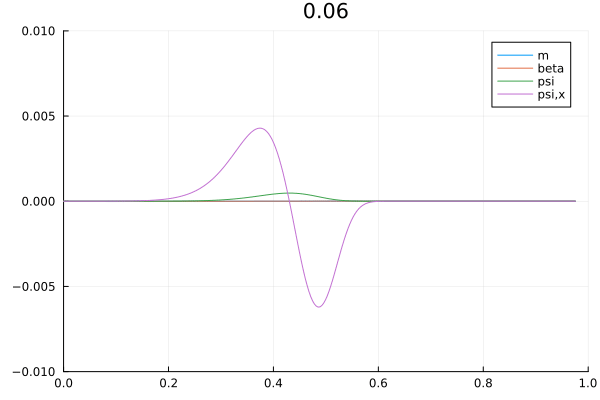

In [445]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 5000:500:104000#870
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    
    #functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/bisectionsearch/run1"*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0, 1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

In [115]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:1000#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2/monitor_ratio10.csv" is not a valid file or doesn't exist

# New test

In [237]:
include("./ScalarField.jl");

function ff(x)

    return x^2

end
function grid(x)

    return(1/2+1/2*cos(pi*(1-0.9*x)))

end;

In [238]:
res=1

dx=0.1

x=range(-3*dx,1+3*dx,step=dx)

y=ff.(x);

In [239]:
L=length(x)

aux=zeros(L)


for i in 4:L-3

    aux[i]=Dertest(y,i,x)

end

println(aux[4:L-3]);
xnew=grid.(x)
ynew=ff.(xnew);

[3.469446951953615e-16, 0.19999999999999996, 0.3999999999999998, 0.6000000000000004, 0.8, 1.0, 1.2, 1.3999999999999995, 1.6000000000000003, 1.8000000000000018, 1.9999999999999978]


In [240]:
spl=Spline1D(xnew[4:L-3],ynew[4:L-3],k=4)
auxnew=zeros(L);

for i in 4:L-3
    auxnew[i]=unevenDer(ynew,i,xnew,spl)
end

println(" ")
println(auxnew[4:L-3])
println(" ")
println(2 .* xnew[4:L-3])

WWWWWWWWWWWWWWWWWWWWAAAAAAAAA 
[1.8494949330273436e-15, 0.043885351791287275, 0.15567207449798512, 0.33868813467634756, 0.5742207084349278, 0.8435655349597687, 1.1253332335643045, 1.3971478906347807, 1.6374239897486917, 1.8270805742745604, 1.9510565162951545]
 
[0.0, 0.039706314323056935, 0.15567207449798492, 0.3386881346763483, 0.5742207084349277, 0.8435655349597689, 1.1253332335643045, 1.3971478906347805, 1.63742398974869, 1.8270805742745622, 1.9510565162951536]


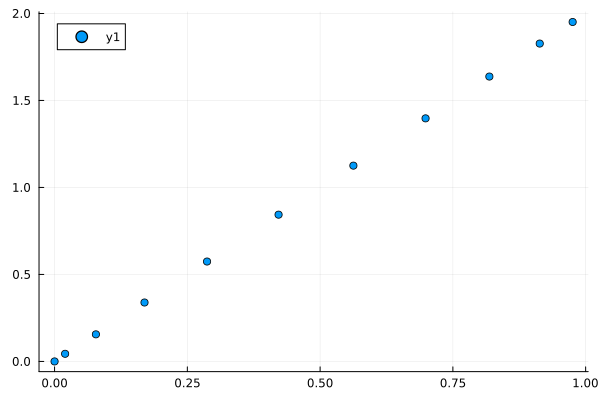

In [243]:

#plot(x,y)

scatter(xnew[4:L-3],auxnew[4:L-3])#,xlim=[0,0.2])

#plot(x[4:L-3],aux[4:L-3])

In [242]:
auxnew[L-3]

1.9510565162951545